In [3]:
from IPython.display import display, Image
import argparse
import numpy as np
import cv2

There are 10 birds in this original image


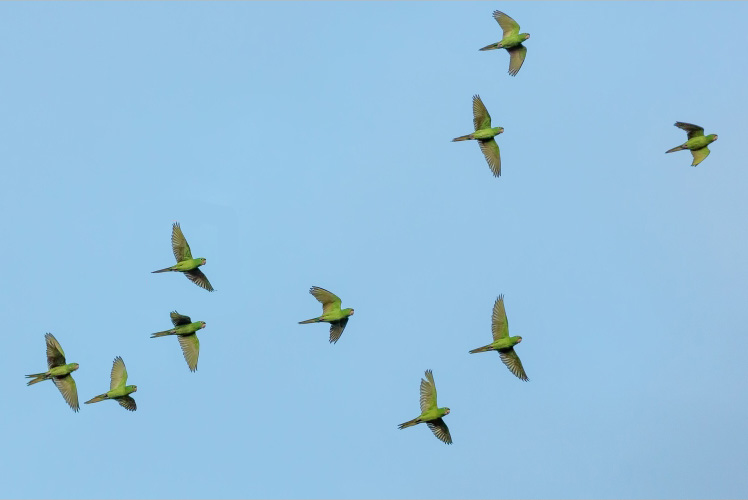

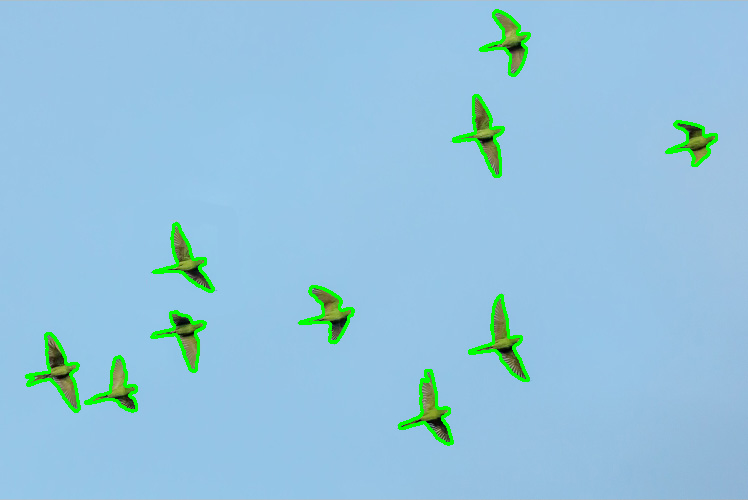

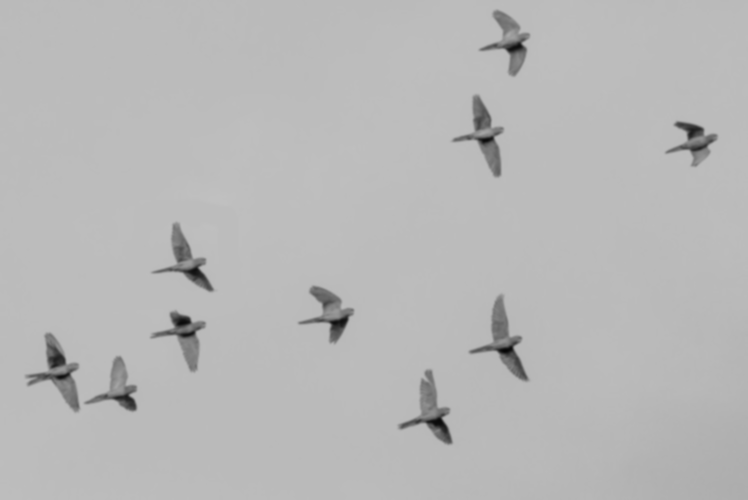

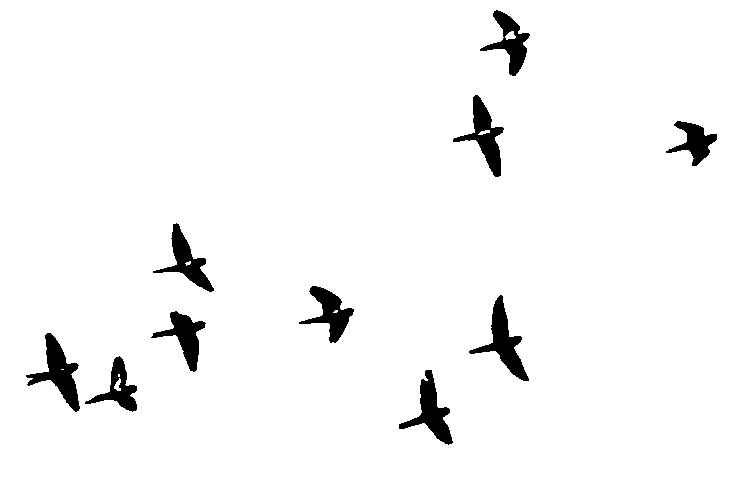

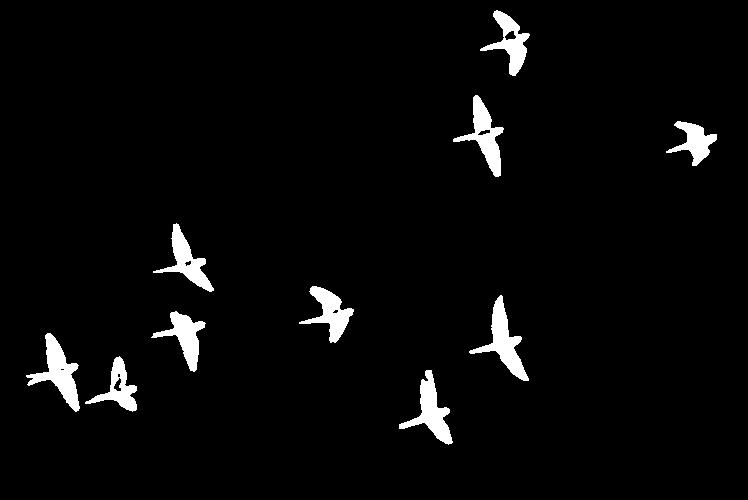

In [4]:
# Specify the path to the image
image_path = r'C:\Users\****\Desktop\BirdPic.jpg'

# "imread" : read the image files using file name
image = cv2.imread(image_path)

# "cvtColor": convert image from one color space to another color space
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# GaussianBlur smooths image with Kernel Size = 5x5
blurred = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Threshold to segment image with illumination above 150 to 255 to select white background area
(T, thresh) = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)

# Threshold to segment image with illumination below 150 to select birds area
(T, threshINV) = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY_INV)

# Find contours in the inverted threshold image
contours, hierarchy = cv2.findContours(threshINV, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Print the number of birds detected
print("There are %d birds in this original image" % (len(contours)))

# Create a copy of the image for drawing contours
contourbirds = image.copy()

# Draw contours on the image
cv2.drawContours(contourbirds, contours, -1, (0, 255, 0), 2)

# Display the original image
display(Image(data=cv2.imencode('.png', image)[1].tobytes(), format='png'))

# Display the contour image
display(Image(data=cv2.imencode('.png', contourbirds)[1].tobytes(), format='png'))

# Display the Gaussian Blur image
display(Image(data=cv2.imencode('.png', blurred)[1].tobytes(), format='png'))

# Display the Threshold Binary image
display(Image(data=cv2.imencode('.png', thresh)[1].tobytes(), format='png'))

# Display the Threshold Binary Inverse image
display(Image(data=cv2.imencode('.png', threshINV)[1].tobytes(), format='png'))